<a href="https://colab.research.google.com/github/tejasc745/cc_102316058/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

paragraph = """Books have always been a gateway to infinite worlds, transporting readers beyond the limits of everyday life. From classic literature to contemporary thrillers, each genre offers unique perspectives and emotions. Immersing myself in a well-crafted narrative can spark creativity and deepen empathy for characters who live in different times and places. The tactile experience of turning pages and the faint scent of old paper create a sensory ritual that digital formats cannot fully replicate. Additionally, discussing favorite titles with friends and joining book clubs fosters a sense of community and shared discovery. Ultimately, books remain an enduring source of insight, inspiration, and joy."""

# 1. Lowercase and remove punctuation
text_lower = re.sub(r'[^\w\s]', '', paragraph.lower())

# 2. Tokenize into sentences and words
sent_tokens = sent_tokenize(paragraph)
word_tokens = word_tokenize(paragraph)

# 3. split() vs word_tokenize()
split_tokens = paragraph.split()
nltk_tokens = word_tokenize(paragraph)

print("First 10 split() tokens:", split_tokens[:10])
print("First 10 word_tokenize() tokens:", nltk_tokens[:10])

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in nltk_tokens if w.lower() not in stop_words and re.match(r'\w+', w)]

# 5. Frequency distribution
fdist = FreqDist(filtered_tokens)
print("Top 10 word frequencies:", fdist.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


First 10 split() tokens: ['Books', 'have', 'always', 'been', 'a', 'gateway', 'to', 'infinite', 'worlds,', 'transporting']
First 10 word_tokenize() tokens: ['Books', 'have', 'always', 'been', 'a', 'gateway', 'to', 'infinite', 'worlds', ',']
Top 10 word frequencies: [('Books', 1), ('always', 1), ('gateway', 1), ('infinite', 1), ('worlds', 1), ('transporting', 1), ('readers', 1), ('beyond', 1), ('limits', 1), ('everyday', 1)]


In [ ]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. Extract alphabetic words
alpha_words = re.findall(r'\b[a-zA-Z]+\b', text_lower)

# 2. Remove stopwords
filtered_alpha = [w for w in alpha_words if w.lower() not in stop_words]

# 3. Stemming
ps = PorterStemmer()
stemmed = [ps.stem(w) for w in filtered_alpha]

# 4. Lemmatization
wnl = WordNetLemmatizer()
lemmatized = [wnl.lemmatize(w) for w in filtered_alpha]

print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemmed: ['book', 'alway', 'gateway', 'infinit', 'world', 'transport', 'reader', 'beyond', 'limit', 'everyday', 'life', 'classic', 'literatur', 'contemporari', 'thriller', 'genr', 'offer', 'uniqu', 'perspect', 'emot', 'immers', 'wellcraft', 'narr', 'spark', 'creativ', 'deepen', 'empathi', 'charact', 'live', 'differ', 'time', 'place', 'tactil', 'experi', 'turn', 'page', 'faint', 'scent', 'old', 'paper', 'creat', 'sensori', 'ritual', 'digit', 'format', 'cannot', 'fulli', 'replic', 'addit', 'discuss', 'favorit', 'titl', 'friend', 'join', 'book', 'club', 'foster', 'sens', 'commun', 'share', 'discoveri', 'ultim', 'book', 'remain', 'endur', 'sourc', 'insight', 'inspir', 'joy']
Lemmatized: ['book', 'always', 'gateway', 'infinite', 'world', 'transporting', 'reader', 'beyond', 'limit', 'everyday', 'life', 'classic', 'literature', 'contemporary', 'thriller', 'genre', 'offer', 'unique', 'perspective', 'emotion', 'immersing', 'wellcrafted', 'narrative', 'spark', 'creativity', 'deepen', 'empathy', 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

docs = [
    "The economy is growing steadily with new policies in place.",
    "Advancements in AI technology are revolutionizing healthcare industries.",
    "Local sports teams are gearing up for the upcoming season and fans are excited."
]

# 1. Bag of Words
count_vec = CountVectorizer()
bow = count_vec.fit_transform(docs)
print("Vocabulary:", count_vec.vocabulary_)
print("BoW Representation:\n", bow.toarray())

# 2. TF-IDF
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(docs)
feature_names = tfidf_vec.get_feature_names_out()

# 3. Top 3 keywords per document
for i, row in enumerate(tfidf.toarray()):
    top_indices = row.argsort()[-3:][::-1]
    top_terms = [feature_names[idx] for idx in top_indices]
    print(f"Doc {i+1} top terms:", top_terms)

Vocabulary: {'the': 24, 'economy': 4, 'is': 13, 'growing': 9, 'steadily': 21, 'with': 27, 'new': 15, 'policies': 17, 'in': 11, 'place': 16, 'advancements': 0, 'ai': 1, 'technology': 23, 'are': 3, 'revolutionizing': 18, 'healthcare': 10, 'industries': 12, 'local': 14, 'sports': 20, 'teams': 22, 'gearing': 8, 'up': 25, 'for': 7, 'upcoming': 26, 'season': 19, 'and': 2, 'fans': 6, 'excited': 5}
BoW Representation:
 [[0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1]
 [1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 1 2 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0]]
Doc 1 top terms: ['with', 'policies', 'place']
Doc 2 top terms: ['revolutionizing', 'technology', 'healthcare']
Doc 3 top terms: ['are', 'upcoming', 'sports']


In [ ]:
import re
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Two short texts
text1 = """Artificial Intelligence (AI) refers to machines that can perform tasks \
that typically require human intelligence. Its ability to learn and adapt has revolutionized numerous industries."""
text2 = """Blockchain is a decentralized ledger technology that ensures secure, transparent \
transactions. Its transparency and security make it ideal for multiple applications."""

# Preprocess & tokenize
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return word_tokenize(text)

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

# a. Jaccard Similarity
set1, set2 = set(tokens1), set(tokens2)
jaccard_sim = len(set1 & set2) / len(set1 | set2)

# b. Cosine Similarity
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

print(f"Jaccard Similarity: {jaccard_sim:.3f}")
print(f"Cosine Similarity: {cosine_sim:.3f}")

# c. Analysis
print("\nAnalysis:")
print("Jaccard measures raw token overlap, treating every token equally.")
print("Cosine with TF-IDF weights terms by importance and scales to text length.")
print("Here, cosine similarity provides more nuanced insight into thematic overlap.")

Jaccard Similarity: 0.075
Cosine Similarity: 0.089

Analysis:
Jaccard measures raw token overlap, treating every token equally.
Cosine with TF-IDF weights terms by importance and scales to text length.
Here, cosine similarity provides more nuanced insight into thematic overlap.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Review: I love this service; it has truly changed my life for the better!
Polarity: 0.56, Subjectivity: 0.55, Label: Positive

Review: The product is okay but could be better in terms of durability.
Polarity: 0.50, Subjectivity: 0.50, Label: Positive

Review: I am extremely disappointed with the quality and performance.
Polarity: -0.75, Subjectivity: 0.75, Label: Negative



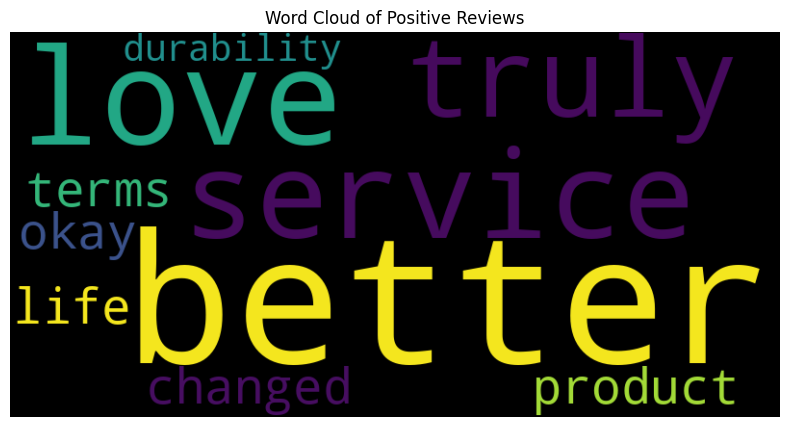

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample reviews
reviews = [
    "I love this service; it has truly changed my life for the better!",
    "The product is okay but could be better in terms of durability.",
    "I am extremely disappointed with the quality and performance."
]

# 1. Polarity & subjectivity
results = []
for review in reviews:
    blob = TextBlob(review)
    polarity, subjectivity = blob.sentiment
    if polarity > 0.1:
        label = 'Positive'
    elif polarity < -0.1:
        label = 'Negative'
    else:
        label = 'Neutral'
    results.append((review, polarity, subjectivity, label))

# 2. Classification output
for r in results:
    print(f"Review: {r[0]}\nPolarity: {r[1]:.2f}, Subjectivity: {r[2]:.2f}, Label: {r[3]}\n")

# 3. Word cloud of positive reviews
positive_text = ' '.join([r[0] for r in results if r[3] == 'Positive'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()